In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection  import cross_val_score 
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


In [2]:
df = pd.read_csv('data.csv')

# DataFrame

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Checking null values in dataframe

In [4]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## Statistic of Fetaure columns

In [5]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Categorical Encoding

In [6]:
dfx = df.copy()

# Creating a list for categorical and numerical column names
cat = []
num = []

for n,d in dfx.items():
    if d.dtype == 'object':
        cat.append(n)
    else:
        num.append(n)

dfx = df.copy()

# Transform Categorical columns
le = LabelEncoder()

for i in cat:
    dfx[i] = le.fit_transform(dfx[i])

# Transform numerical columns
ss = StandardScaler()

for i in num:
    dfx[i] = ss.fit_transform(dfx[[i]])
    


## Finding Columns that most correlated with price 

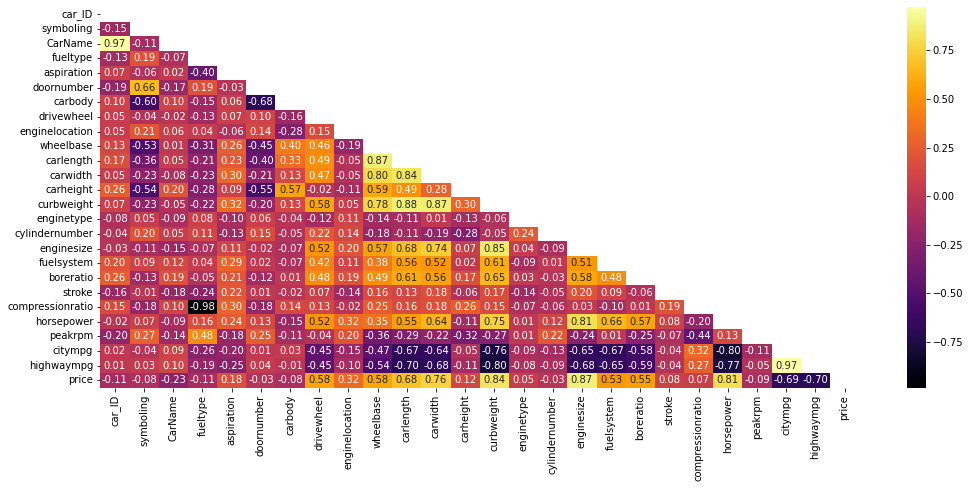

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
    
corr= dfx.corr()
matrix = np.triu(corr)
plt.figure(figsize = (17,7))
sns.heatmap(corr, annot=True, mask=matrix, fmt = ".2f", cmap = 'inferno');

In [8]:
abs(corr['price']).sort_values(ascending = False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
highwaympg          0.697599
citympg             0.685751
carlength           0.682920
drivewheel          0.577992
wheelbase           0.577816
boreratio           0.553173
fuelsystem          0.526823
enginelocation      0.324973
CarName             0.231439
aspiration          0.177926
carheight           0.119336
car_ID              0.109093
fueltype            0.105679
peakrpm             0.085267
carbody             0.083976
symboling           0.079978
stroke              0.079443
compressionratio    0.067984
enginetype          0.049171
doornumber          0.031835
cylindernumber      0.027628
Name: price, dtype: float64

# Feature selection 

In [9]:
columns = ['enginesize','curbweight','horsepower','carwidth','highwaympg','citympg','carlength','drivewheel','wheelbase','boreratio',
          'fuelsystem']
X = dfx[columns]
Y = dfx['price']

In [10]:
X

,enginesize,curbweight,horsepower,carwidth,highwaympg,citympg,carlength,drivewheel,wheelbase,boreratio,fuelsystem
0,0.074449,-0.014566,0.174483,-0.844782,-0.546059,-0.646553,-0.426521,2,-1.690772,0.519071,5
1,0.074449,-0.014566,0.174483,-0.844782,-0.546059,-0.646553,-0.426521,2,-1.690772,0.519071,5
2,0.604046,0.514882,1.264536,-0.190566,-0.691627,-0.953012,-0.231513,2,-0.708596,-2.404880,5
3,-0.431076,-0.420797,-0.053668,0.136542,-0.109354,-0.186865,0.207256,1,0.173698,-0.517266,5
4,0.218885,0.516807,0.275883,0.230001,-1.273900,-1.106241,0.207256,0,0.107110,-0.517266,5
...,...,...,...,...,...,...,...,...,...,...,...
200,0.339248,0.763241,0.250533,1.398245,-0.400490,-0.340094,1.198549,2,1.721873,1.666445,5
201,0.339248,0.949992,1.416637,1.351515,-0.837195,-0.953012,1.198549,2,1.721873,1.666445,5
202,1.109571,0.878757,0.757535,1.398245,-1.128332,-1.106241,1.198549,2,1.721873,0.926204,5
203,0.435538,1.273437,0.047732,1.398245,-0.546059,0.119594,1.198549,2,1.721873,-1.183483,3


## Splitting Data between Train and Test

In [11]:
from sklearn.model_selection import train_test_split, cross_validate
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

# Model Building 

In [12]:
cv_score = []
mae = []
r_score = []
def model(model):
    mod = model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    CV_score = np.mean(cross_val_score(mod,X,Y,cv=5))*100
    cv_score.append(CV_score)
    m = mean_absolute_error(y_test,y_pred)*100
    r_scr = r2_score(y_test,y_pred)*100
    r_score.append(r_scr)
    mae.append(m)
    print(f'MAE of {model}: {m}')
    print(f'Cross validation score of {model}: {CV_score}')
    print(f'R^2 score of {model}: {r_scr}')
    

# Checking Different models for maximum accuracy 

## LInearRegression

In [29]:
LR = model(LR)

MAE of LinearRegression(): 34.425530818790484
Cross validation score of LinearRegression(): 48.22068480592832
R^2 score of LinearRegression(): 79.05606915519907


##  Ridge


In [30]:
mod = Ridge(alpha=0.1)
ridge = model(mod)

MAE of Ridge(alpha=0.1): 34.367876032343474
Cross validation score of Ridge(alpha=0.1): 48.336456042964066
R^2 score of Ridge(alpha=0.1): 79.13096357100831


## DecisionTreeRegressor

In [31]:
DTR =model(DecisionTreeRegressor())

MAE of DecisionTreeRegressor(): 28.52311281447649
Cross validation score of DecisionTreeRegressor(): 13.483225505074117
R^2 score of DecisionTreeRegressor(): 81.50278944036293


## XGBRegressor

In [32]:
mod = XGBRegressor()
xgb =model(mod)

MAE of XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...): 23.144388703000228
Cross validation score of XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, gro

## GradientBoostingRegressor


In [33]:
gbd = model(GradientBoostingRegressor(learning_rate=0.1))

MAE of GradientBoostingRegressor(): 24.191518465080172
Cross validation score of GradientBoostingRegressor(): 49.5110969443166
R^2 score of GradientBoostingRegressor(): 89.54344735622372


## RandomForestRegressor


In [34]:
RF =model(RandomForestRegressor())

MAE of RandomForestRegressor(): 21.7418518959954
Cross validation score of RandomForestRegressor(): 39.046162261281786
R^2 score of RandomForestRegressor(): 91.4238114041378


## LGBMRegressor

In [35]:
LGBM =model(LGBMRegressor())

MAE of LGBMRegressor(): 24.98612911079287
Cross validation score of LGBMRegressor(): 32.545396727545835
R^2 score of LGBMRegressor(): 87.81851391806991


## AdaBoostRegressor

In [36]:
ABR = model(AdaBoostRegressor())

MAE of AdaBoostRegressor(): 23.802205562597553
Cross validation score of AdaBoostRegressor(): 42.78513438348178
R^2 score of AdaBoostRegressor(): 90.52882439528756


In [21]:
models = ["Linear Regression",'Ridge',"Decision Tree","XGBoost","Gradient Boost","Random Forest","LGBM","Ada Boost"]

In [22]:
cv_score

[48.22068480592832,
 48.336456042964066,
 0.7658353956480646,
 39.53070101050559,
 44.46383623161464,
 38.933097233845224,
 32.545396727545835,
 34.89696892582036]

In [23]:
r_score

[79.05606915519907,
 79.13096357100831,
 80.58989105408212,
 89.24850425973867,
 89.98150405355948,
 91.9893072121779,
 87.81851391806991,
 90.0284497886985]

In [24]:
mae

[34.425530818790484,
 34.367876032343474,
 28.686237919959385,
 23.144388703000228,
 23.743872312531806,
 20.860402652804737,
 24.98612911079287,
 24.471244131213325]

# Plot Performance of Different Models

In [25]:
df = pd.DataFrame({"Algorithms":models,
                   "Model score":r_score,
                   "MAE":mae})

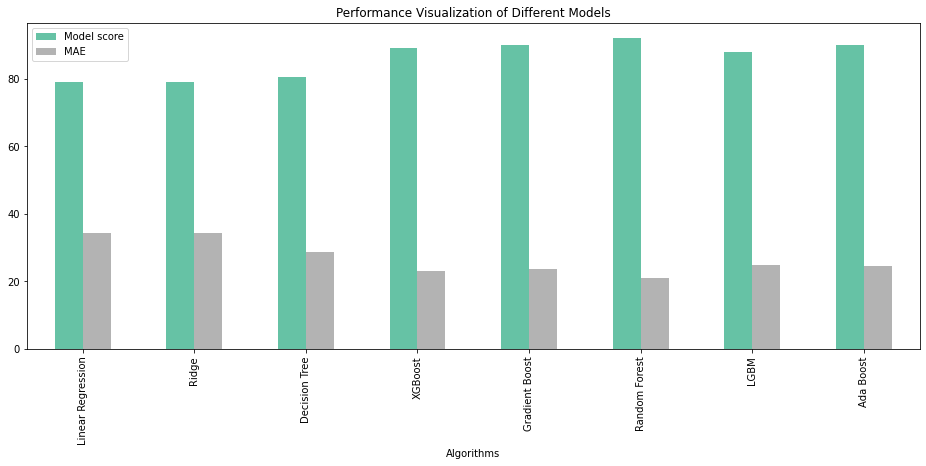

In [27]:
df.plot(x="Algorithms",y=["Model score","MAE"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set2")
plt.show()

## Insights: 
As we can see Ada Boost and Gradient Boost is better alforithims with less MAE

In [42]:
def inp(i):
    mod = AdaBoostRegressor()
    mod.fit(X,Y)
    return mod.predict(i)[0]


# Working

In [43]:
i = [[0.074449,-0.01456,0.17448,-0.84478,-0.546059,-0.646553,-0.426521,2,-1.690772,0.51907,5]]
inp(i)

c:\users\dheeraj chouhan\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


0.10986866048709154